# Análise de dados de E-commerce


### Objetivo: Obter insights e buscar padrões.

Fonte dos dados: https://www.kaggle.com/olistbr/brazilian-ecommerce

O dataset contém informações de 100 mil pedidos de 2016 a 2018 feitos em diversos mercados no Brasil.

In [ ]:
# Pacotes.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados.
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name = pd.read_csv("product_category_name_translation.csv")

In [3]:
# Merge
df = orders.copy()
df = df.merge(customers,on='customer_id',indicator = True)
df = df.merge(order_reviews,on='order_id')
df = df.merge(order_payments,on='order_id')
df = df.merge(order_items,on='order_id')
df = df.merge(products,on='product_id')
df = df.merge(sellers,on='seller_id')
df = df.merge(product_category_name)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares


In [4]:
# Informações dos dados.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 41 columns):
order_id                         116581 non-null object
customer_id                      116581 non-null object
order_status                     116581 non-null object
order_purchase_timestamp         116581 non-null object
order_approved_at                116567 non-null object
order_delivered_carrier_date     115368 non-null object
order_delivered_customer_date    114066 non-null object
order_estimated_delivery_date    116581 non-null object
customer_unique_id               116581 non-null object
customer_zip_code_prefix         116581 non-null int64
customer_city                    116581 non-null object
customer_state                   116581 non-null object
_merge                           116581 non-null category
review_id                        116581 non-null object
review_score                     116581 non-null int64
review_comment_title             13996 non-null o

## Total de vendas por UF

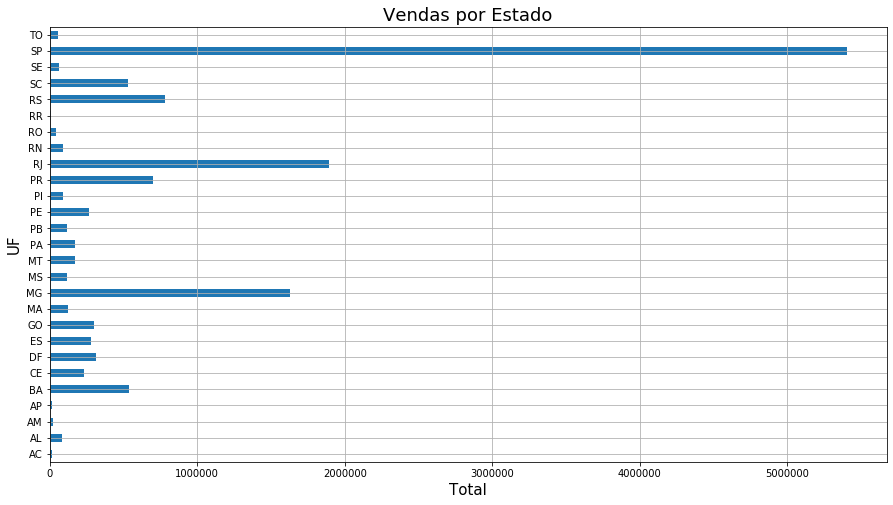

In [5]:
# plot.
states = df.groupby(['customer_state']).sum()
states['price'].plot(kind = "barh", figsize=(15,8))
plt.title("Vendas por Estado", fontsize = 18)
plt.xlabel("Total", fontsize = 15)
plt.ylabel("UF", fontsize = 15)
plt.grid()
plt.show()

## Formas de pagamentos realizadas

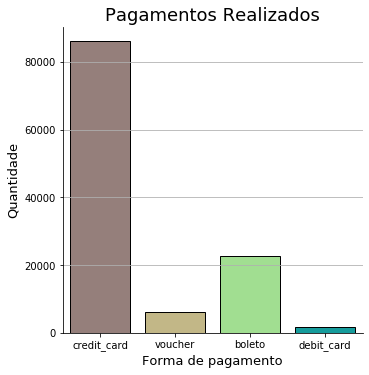

In [6]:
# plot.
sns.catplot(x = "payment_type", kind = "count", palette = "terrain_r", edgecolor='black', data = df)
plt.title("Pagamentos Realizados", fontsize = 18)
plt.xlabel("Forma de pagamento", fontsize = 13)
plt.ylabel("Quantidade", fontsize = 13)
plt.rc("grid", linestyle = "-", color = "black")
plt.grid(axis='y')
plt.show()

## Status dos pedidos

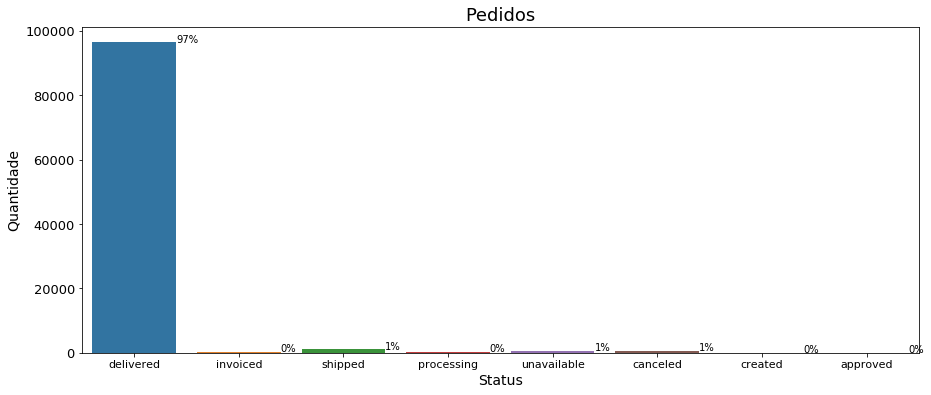

In [7]:
# Plot.
plt.figure(figsize = (15,6))
total = float(len(orders["order_status"]))
ax = sns.countplot(x="order_status", data= orders)
plt.title("Pedidos", fontsize = 18)
plt.xlabel("Status", fontsize = 14)
plt.xticks(size = 11)
plt.ylabel("Quantidade", fontsize = 14)
plt.yticks(size = 13)
for i in ax.patches:
    percentage = '{:.0f}%'.format(100 * i.get_height()/total)
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = "left")
plt.show()

## Custo médio de frete por cidade

In [8]:
# Frete
round(df.groupby("seller_city")["freight_value"].mean().sort_values(ascending = True).head(60), 2)

seller_city
jacarei / sao paulo            8.60
sao paulo / sao paulo          9.17
brotas                         9.51
sao pauo                       9.56
carapicuiba / sao paulo       11.10
guaratingueta                 11.17
mogi das cruses               11.19
vicente de carvalho           11.51
hortolandia                   11.54
francisco morato              11.70
franco da rocha               12.06
pouso alegre                  12.48
imigrante                     12.48
marapoama                     12.69
macatuba                      12.69
cravinhos                     12.79
avare                         12.79
santa terezinha de goias      12.87
fernando prestes              12.94
mogi mirim                    12.96
vargem grande paulista        13.03
alvares machado               13.04
divisa nova                   13.10
santa maria da serra          13.15
taboao da serra               13.18
arinos                        13.31
embu guacu                    13.32
sando andre     

## Custo médio de frete por UF

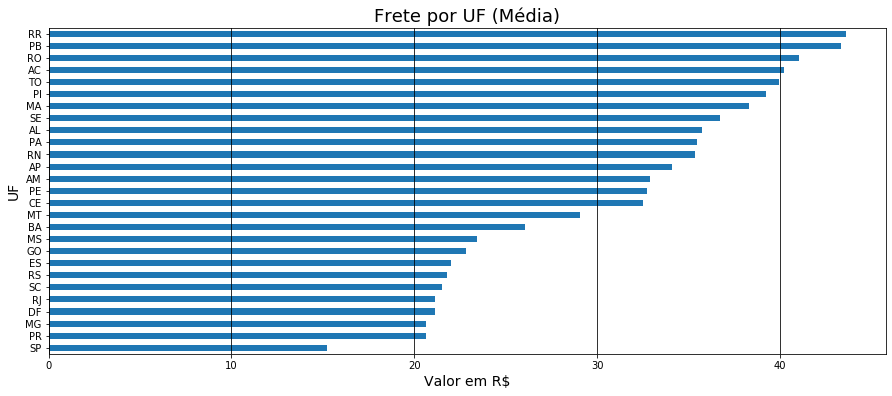

In [9]:
# Plot.
plt.figure(figsize = (15,6))
df.groupby("customer_state")["freight_value"].mean().sort_values(ascending = True).plot.barh()
plt.title("Frete por UF (Média)", fontsize = 18)
plt.xlabel("Valor em R$", fontsize = 14)
plt.ylabel("UF", fontsize = 14)
plt.grid(axis='x')
plt.show()

O Norte e Nordeste do país lideram os fretes mais caros, seguidos pelo Centro-Oeste, Sul e Sudeste.

In [10]:
# Obtendo algumas colunas.
df2 = df[["order_purchase_timestamp", "order_estimated_delivery_date", "order_delivered_customer_date", "customer_state"]]
df2.head()

,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,customer_state
0,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
1,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
2,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP
3,2017-08-15 18:29:31,2017-08-28 00:00:00,2017-08-18 14:44:43,SP
4,2017-08-02 18:24:47,2017-08-15 00:00:00,2017-08-07 18:30:01,SP


In [11]:
# Verificando valores missing.
df2.isnull().sum()

order_purchase_timestamp            0
order_estimated_delivery_date       0
order_delivered_customer_date    2515
customer_state                      0
dtype: int64

In [12]:
# No primeiro momento faremos a remoção dos valores missing.
df2.dropna(inplace=True)

In [13]:
# Transformando as variáveis em datetime.
df2["purchase"] = pd.to_datetime(df["order_purchase_timestamp"])
df2["estimated"] = pd.to_datetime(df["order_estimated_delivery_date"])
df2["delivered"] = pd.to_datetime(df["order_delivered_customer_date"])

In [14]:
# Calculando as diferenças entre a entrega e a data de compra (em dias).
df2["days_purch"] = (df2["delivered"] - df2["purchase"]).dt.days

# Calculando as diferenças entre a data estimada de entrega e a data de compra (em dias).
df2["days_est"] = (df2["estimated"] - df2["purchase"]).dt.days
df2.head()

,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,customer_state,purchase,estimated,delivered,days_purch,days_est
0,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
1,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
2,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,SP,2017-10-02 10:56:33,2017-10-18,2017-10-10 21:25:13,8,15
3,2017-08-15 18:29:31,2017-08-28 00:00:00,2017-08-18 14:44:43,SP,2017-08-15 18:29:31,2017-08-28,2017-08-18 14:44:43,2,12
4,2017-08-02 18:24:47,2017-08-15 00:00:00,2017-08-07 18:30:01,SP,2017-08-02 18:24:47,2017-08-15,2017-08-07 18:30:01,5,12


## Tempo previsto de entrega

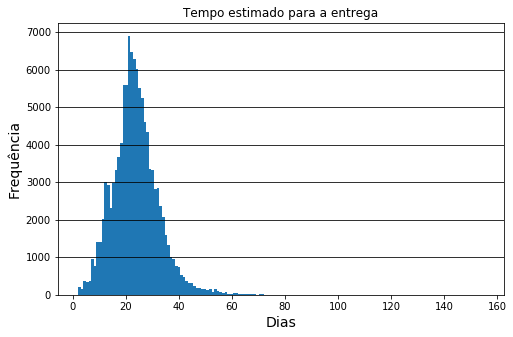

In [15]:
# Plot
df2["days_est"].plot.hist(bins = df2["days_est"].max(), figsize = (8,5))
plt.title('Tempo estimado para a entrega')
plt.xlabel('Dias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.grid(axis='y')

## Tempo real de entrega

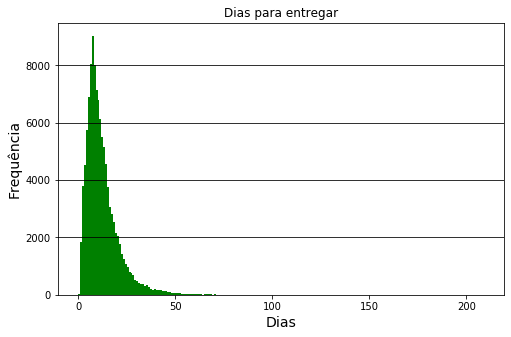

In [16]:
# Plot
df2["days_purch"].plot.hist(bins = df2["days_purch"].max(), color = "g", figsize = (8,5))
plt.title('Dias para entregar')
plt.xlabel('Dias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
plt.grid(axis='y')

Como mostra acima, a entrega, na maioria dos casos é feita antes do prazo estimado.

In [17]:
# Criando a variável para analisar os atrasos.
df2["delayed"] = (df2["estimated"] - df2["delivered"]).dt.days

# Obtendo os valores negativos que representam os atrasos.
df2_count_delay = df2[df2["delayed"] < 0].groupby(["customer_state"], as_index=False)["delayed"].count()

# Agrupando a UF nos dados.
df2_total = df2.groupby(df2["customer_state"], as_index = False)["delayed"].count()

In [18]:
# Unindo as informações.
df2_total = df2_count_delay.merge(df2_total, on = "customer_state")
df2_total.rename(columns = {"delayed_y" : "total_orders"}, inplace = True)

In [19]:
# Adicionando a variável com a % de atrasos.
df2_total["%"] = round((df2_total["delayed_x"] / df2_total["total_orders"]) * 100, 2)
df2_total.sort_values(by = "%", ascending = False).head()

,customer_state,delayed_x,total_orders,%
1,AL,108,441,24.49
9,MA,166,814,20.39
16,PI,87,547,15.90
24,SE,61,384,15.89
5,CE,219,1488,14.72


In [20]:
# Instanciando as maiores e menores ocorrências de atraso.
delay_max = df2_total["%"].sort_values(ascending = False)[0:5]
delay_min = df2_total["%"].sort_values(ascending = True)[0:5]

## Estados com maiores ocorrências de atraso

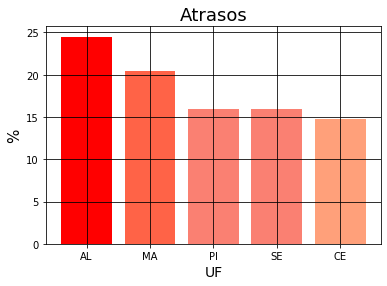

In [21]:
UF = ["AL", "MA", "PI", "SE", "CE"]
colors = ["red", "tomato", "salmon", "salmon", "lightsalmon"]
plt.bar(UF, delay_max, color = colors)
plt.title("Atrasos", fontsize = 18)
plt.ylabel("%", fontsize = 15)
plt.xlabel("UF", fontsize = 14)
plt.grid()
plt.show()

## Estados com menores ocorrências de atraso

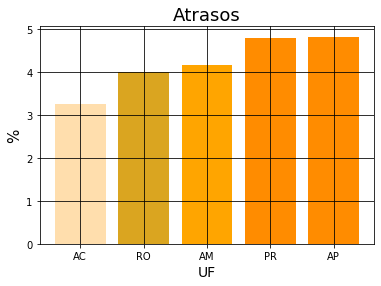

In [22]:
UF = ["AC", "RO", "AM", "PR", "AP"]
colors = ["navajowhite", "goldenrod", "orange", "darkorange", "darkorange"]
plt.bar(UF, delay_min, color = colors)
plt.title("Atrasos", fontsize = 18)
plt.ylabel("%", fontsize = 15)
plt.xlabel("UF", fontsize = 14)
plt.grid()
plt.show()

Como podemos ver, no Nordeste do país, os atrasos são recorrentes, um dos motivos pode ser devido a distância. Mas por outro lado, a parte Norte, ocorre com menos frequência, posteriormente, poderemos obter mais informações.

In [47]:
# Merge.
product_orders=pd.merge(order_items,products, on="product_id")

In [52]:
# Obtendo somente os 6 últimos caractétes de cada produto para uma análise.
product_orders['product_id_shorten']=product_orders['product_id'].str[-6:]

## Top 10 Produtos vendidos

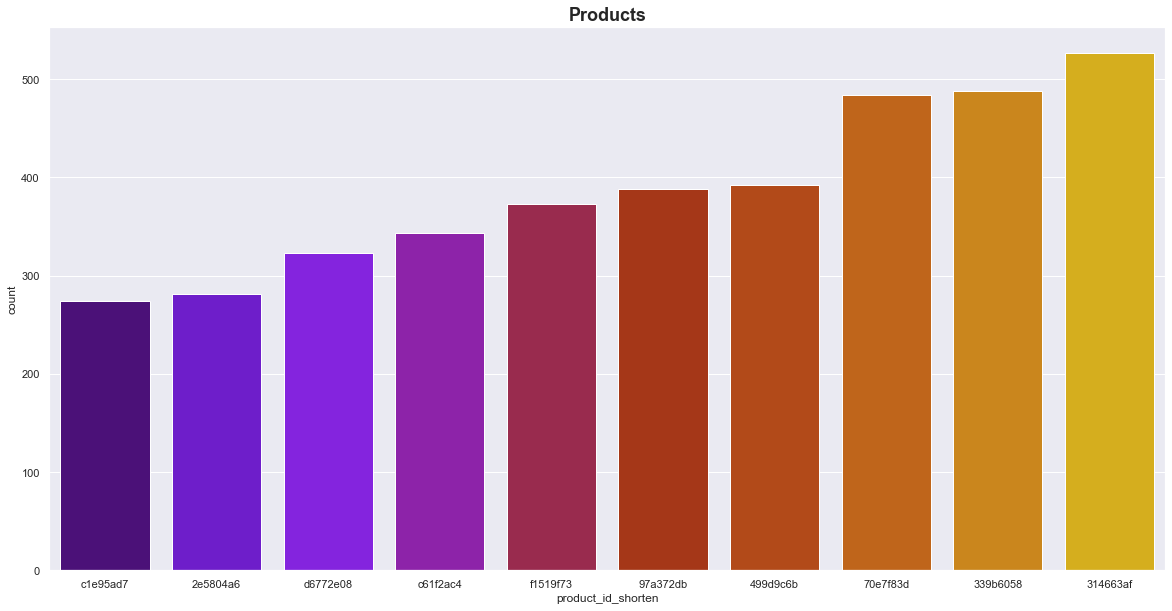

In [80]:
# Plot.

plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders, palette='gnuplot',
             order=product_orders['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Products", fontsize=18, weight='bold')
plt.show()

Pelas informações dos dados, não será possível dizer quais são os produtos, mas pelo que temos, será possível mostrar a sua categoria.

## Top 10 categorias

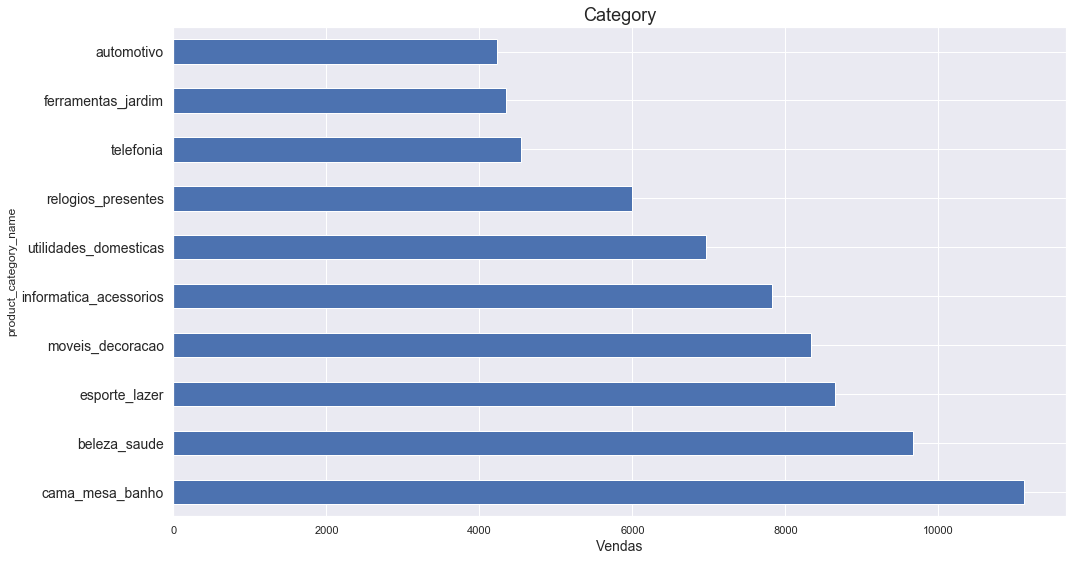

In [83]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending = False).head(10).plot.barh()
plt.title("Category", fontsize = 18)
plt.xlabel("Vendas", fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Desta forma ficou bem intuitivo e podemos ver que a categiria de "Cama, mesa e banho", juntamente com a "Beleza e saúde", sobressaem das demais.

# Conclusão

Alguns padrões e insights foram obtidos como:

- Valores dos fretes por cidade e estado;
- Situação atual dos pedidos;
- Estados com mais/menos vendas;
- As principais formas de pagamento;
- Estados com mais/menos ocorrências de atrasos.

Posteriormente será feito uma análise com mapas Geoespaciais, para apronfudarmos na questão dos atrasos recorrentes. 